<a id='intro'></a>
## Introduction

I've selected "No-show appointments" data set for analysis, which I uploaded to this workspace. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

Questions that I plan on exploring: 
    1. What is the percentage for show-up patients in total.
    2. Which hospital (Neighbourhood) has more show-up patients.
    3. How depend show-up from: 
       -gender
       -age
       -if patient has a scholarship(enrolled in Bolsa Familia)
       -if patient has hipertension, diabebetis, alcoholism, handcaped



In [1]:
#  set up all of the packages that I plan to use.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I load in the data, check it for cleanliness, and then trim and clean dataset for analysis. 
### General Properties

In [2]:
# Load data and print out a line. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
#Perform operations to inspect data
df.shape

(110527, 14)

>We can see that our file has 110527 records ans 14 columns.

In [4]:
#  Find out data types and look for missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> We don't have missing data. And we can see the datatype of each column here.

In [5]:
#Check if there is duplicates in our data set
sum(df.duplicated())

0

>And we don't have duplicates.

In [6]:
#Find out how many unique patients in our data set
df['PatientId'].nunique()

62299

>And we have 62299 unique patients out of 110527 records. So some of them is returning patients.

In [7]:
#Check if there is null data in our data set.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> There is no null data in our data set


### Data Cleaning

In [8]:
# Rename column "No-show" with underscore instead of dash for more convenience
df.rename(columns={'No-show':'No_show'}, inplace=True)


In [9]:
# During analysis I found that in 'Age' column there is value "-1". I want to clean it here
# by excluding this column from our data set.
df = df[df.Age != -1]
#check
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


In [10]:
# Replace no-show "yes" to "0" "no" to "1" and add a new column "Show" with 0/1 values
df['Show'] = df.No_show.eq('Yes').mul(1)
#check
df['Show'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    0
17    1
18    0
19    0
Name: Show, dtype: int64

In [12]:
# Add one more column for Age_group
# Reference: https://stackoverflow.com/questions/30926670/pandas-add-multiple-empty-columns-to-dataframe
df = pd.concat([df, pd.DataFrame(columns=['Age_group'])])
#cut age to groups
bin_edges = [0, 18 , 38, 56, 115]
#labeles for each age group
bin_names = ['<=18', '19-38', '39-56', '57-115']
#Assign values to column "Age_group" based on cutting "Age" columns
df.loc[:, 'Age_group'] = pd.cut(df['Age'], bin_edges, labels=bin_names, include_lowest=True)
df.head(1)

,Age,Age_group,Alcoholism,AppointmentDay,AppointmentID,Diabetes,Gender,Handcap,Hipertension,Neighbourhood,No_show,PatientId,SMS_received,ScheduledDay,Scholarship,Show
0,62.0,57-115,0.0,2016-04-29T00:00:00Z,5642903.0,0.0,F,0.0,1.0,JARDIM DA PENHA,No,2.987250e+13,0.0,2016-04-29T18:38:08Z,0.0,0.0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the percentage for show-up patients in total.

In [13]:
# Create new data set df_show only for patients that shows on appointment
df_show = df[df['No_show'] == 'No']
# Find out sizes for created data set
df_show.shape

(88207, 16)

In [14]:
# Calculate percentage for show-up patients vs total patients with appointments
pct_show = df_show['PatientId'].count()/df['PatientId'].count()
pct_show

0.79806561352080052

> We selected all appointments  tha was showed-up. There is 88208 out of 110527 total. It's 79,8%.

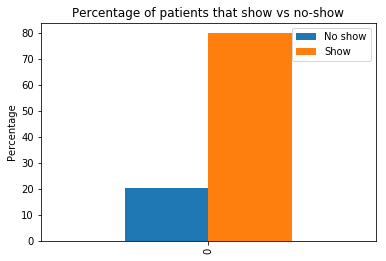

In [15]:
#Visualization: Percentage of patients that show vs no-show.
df_my = pd.DataFrame({'Show':[pct_show*100],
                   'No show':[(1-pct_show)*100]})
df_my.plot(kind='bar',title='Percentage of patients that show vs no-show')
plt.ylabel('Percentage')
plt.show()

### Research Question 2:  Which hospital (Neighbourhood) has more show-up patients.

In [16]:
# Check how much unique values of hospital (Neighbourhood) we have for data set with only show-up patients
df_show['Neighbourhood'].nunique()

80

In [17]:
# Find how much show appointments in each hospital
df_show.groupby(['Neighbourhood'], as_index=False)['AppointmentID'].count()

,Neighbourhood,AppointmentID
0,AEROPORTO,7
1,ANDORINHAS,1741
2,ANTÔNIO HONÓRIO,221
3,ARIOVALDO FAVALESSA,220
4,BARRO VERMELHO,332
5,BELA VISTA,1523
6,BENTO FERREIRA,665
7,BOA VISTA,254
8,BONFIM,2223
9,CARATOÍRA,1974


In [18]:
#Find and print hospital name  with maximum count of show appointments
df_neighbourhood = df_show.groupby(['Neighbourhood'])['AppointmentID'].count()

[df_neighbourhood.idxmax(), df_neighbourhood.max()]

['JARDIM CAMBURI', 6252]

In [19]:
#Find and print hospital name  with minimum count of show appointments
[df_neighbourhood.idxmin(), df_neighbourhood.min()]

['PARQUE INDUSTRIAL', 1]

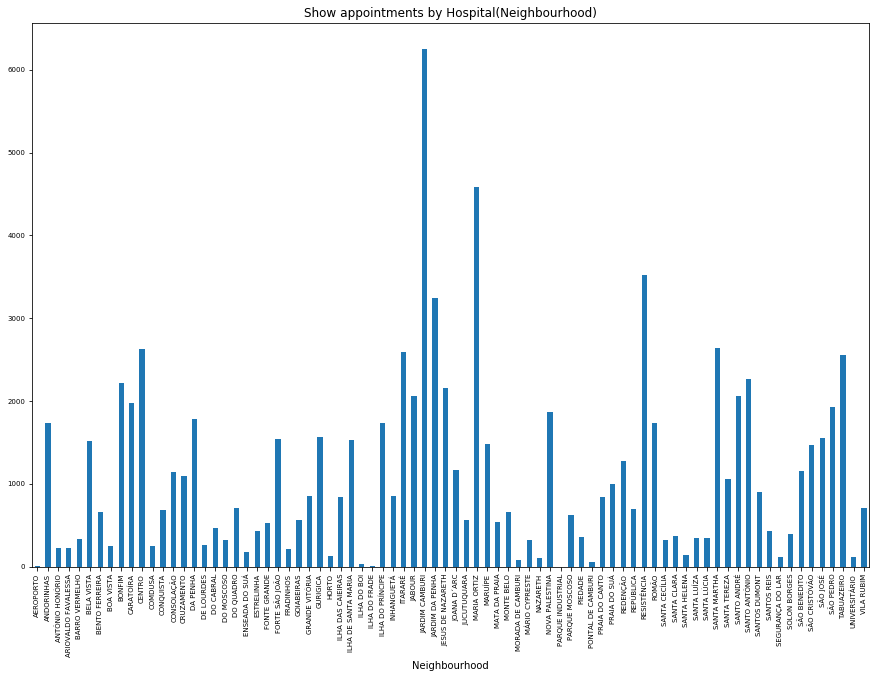

In [20]:
#Visualization: Show appointments by Hospital(Neighbourhood)
df_show.groupby(['Neighbourhood'])['AppointmentID'].count().plot(kind='bar', fontsize=7, figsize=(15,10), title='Show appointments by Hospital(Neighbourhood)')

The maximum number of show appointments(6252) is in JARDIM CAMBURI hospital.The minimum number of show appointments(1) is in PARQUE INDUSTRIAL hospital.

### Research Question 3: How depend show-up from: gender, age,  if patient has a scholarship(enrolled in Bolsa Familia), if patient has hipertension, diabebetis, alcoholism, handicapted


In [21]:
#total men that shows on appointment
df_show_M = df_show[df_show['Gender'] == 'M']
df_show_M['Gender'].count()

30962

In [22]:
#total men with appointments scheduled
df_M = df[df['Gender'] == 'M']
df_M['Gender'].count()

38687

In [23]:
pct_M = (df_show_M['Gender'].count()/df_M['Gender'].count())*100
pct_M

80.032052110528085

The percentage of men thet show on appoitment is 80.03%

In [24]:
#total women that shows on appointment
df_show_F = df_show[df_show['Gender'] == 'F']
df_show_F['Gender'].count()

57245

In [25]:
#total women with appointments scheduled
df_F = df[df['Gender'] == 'F']
df_F['Gender'].count()

71839

In [26]:
pct_F = (df_show_F['Gender'].count()/df_F['Gender'].count())*100
pct_F

79.685129247344761

The percentage of women thet show on appointment is 79.68%. Almost the same as men.

Let see how much patients (M,F) have scholarship.

In [27]:
#total show women with shcolarship
df_show_F_sholar = df_show_F[df_show_F['Scholarship'] == 1]
df_show_F_sholar['Scholarship'].count()

6747

In [28]:
pct_F_scholar = (df_show_F_sholar['Scholarship'].count()/df_show_F['Gender'].count())*100
pct_F_scholar

11.786182199318718

Total show women was 57246, so among them with scholarship was only 11.79%

In [29]:
#total show men with shcolarship
df_show_M_sholar = df_show_M[df_show_M['Scholarship'] == 1]
df_show_M_sholar['Scholarship'].count()

1536

In [30]:
pct_M_scholar = (df_show_M_sholar['Scholarship'].count()/df_show_M['Gender'].count())*100
pct_M_scholar

4.9609198372198176

Total show men was 30962, so among them with scholarship was only 4.96%

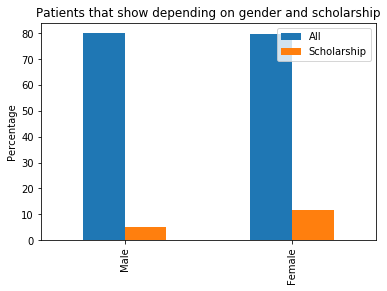

In [31]:
#Visualization: men and women who shows with and without scholarship
df_my = pd.DataFrame({'Scholarship':[pct_M_scholar,pct_F_scholar],
                   'All':[pct_M, pct_F]})

ax = df_my.plot(kind='bar', title = 'Patients that show depending on gender and scholarship')
ax.set_xticklabels(['Male', 'Female'])
plt.ylabel('Percentage')
plt.show()

In [32]:
#View values for cutting Age column
df_show['Age'].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [33]:
#cut age to groups
#bin_edges = [0, 18 , 38, 56, 115]

In [34]:
#labeles for each age group
#bin_names = ['<=18', '19-38', '39-56', '57-115']

In [35]:
#Assign values to column "Age_group" based on cutting "Age" columns
#df_show.loc[:, 'Age_group'] = pd.cut(df_show['Age'], bin_edges, labels=bin_names, include_lowest=True)

In [36]:
#check "Age_group" column
df_show['Age_group']

0         57-115
1          39-56
2         57-115
3           <=18
4          39-56
5         57-115
8          19-38
9          19-38
10         19-38
12         19-38
13         19-38
14         39-56
15          <=18
16         39-56
18         19-38
19         39-56
23         39-56
24        57-115
25         39-56
26         39-56
27          <=18
28         39-56
29         19-38
30         39-56
32        57-115
33         19-38
34        57-115
35          <=18
36        57-115
37        57-115
           ...  
110494     19-38
110495     39-56
110497    57-115
110498    57-115
110499    57-115
110500    57-115
110501     39-56
110502     19-38
110503    57-115
110504      <=18
110505     39-56
110506      <=18
110507      <=18
110508    57-115
110509     19-38
110510    57-115
110511      <=18
110512     39-56
110513      <=18
110514    57-115
110517     19-38
110518     39-56
110519     19-38
110520     39-56
110521     39-56
110522     39-56
110523     39-56
110524     19-

In [37]:
df_show.to_csv('noshow_age_group.csv')

In [38]:
df_show.groupby('Age_group', as_index=False)['AppointmentID'].count()

,Age_group,AppointmentID
0,<=18,22519
1,19-38,22145
2,39-56,21714
3,57-115,21829


In this table we can see show appointments by age group.

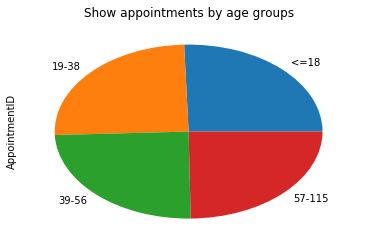

In [39]:
#Visualization
df_show.groupby('Age_group')['AppointmentID'].count().plot(kind='pie', title = 'Show appointments by age groups')

As we can see more show patients are in the age groups "<=18"and "19-38". Other two groups are present in almost eaqual quantity.

In [40]:
#if show patient has hipertension
df_hip_show = df_show[df_show['Hipertension'] == 1]
df_hip_show_count = df_hip_show['AppointmentID'].count()
df_hip = df[df['Hipertension'] == 1]
df_hip_count = df_hip['AppointmentID'].count()
pct_hip_show = df_hip_show_count/df_hip_count*100
pct_hip_show

82.698041374248888

 82,7% patients with hipertension showed up

In [41]:
df_dia_show = df_show[df_show['Diabetes'] == 1]
df_dia_show_count = df_dia_show['AppointmentID'].count()
df_dia = df[df['Diabetes'] == 1]
df_dia_count = df_dia['AppointmentID'].count()
pct_dia_show = df_dia_show_count/df_dia_count*100
pct_dia_show

81.99672667757774

 82% patients with diabetes showed up

In [42]:
df_alc_show = df_show[df_show['Alcoholism'] == 1]
df_alc_show_count = df_alc_show['AppointmentID'].count()
df_alc = df[df['Alcoholism'] == 1]
df_alc_count = df_alc['AppointmentID'].count()
pct_alc_show = df_alc_show_count/df_alc_count*100
pct_alc_show

79.851190476190482

79.85% patients with alcoholism showed up

In [43]:
df_cap_show = df_show[df_show['Handcap'] == 1]
df_cap_show_count = df_cap_show['AppointmentID'].count()
df_cap = df[df['Handcap'] == 1]
df_cap_count = df_cap['AppointmentID'].count()
pct_cap_show = df_cap_show_count/df_cap_count*100
pct_cap_show

82.07639569049951

82.08% handcaped patients showed up

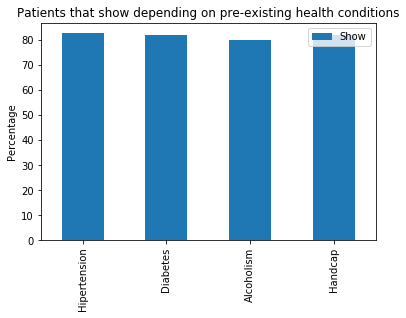

In [44]:
#Visualization: Percentage of patients that show depending on pre-existing health conditions
df_my = pd.DataFrame({'Show':[pct_hip_show,pct_dia_show,pct_alc_show,pct_cap_show]})

ax = df_my.plot(kind='bar', title = 'Patients that show depending on pre-existing health conditions')
ax.set_xticklabels(['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'])
plt.ylabel('Percentage')
plt.show()


People with alcoholism have a little more chances for no-show.

In [45]:
#See which columns are correlated
df.corr()

,Age,Alcoholism,AppointmentID,Diabetes,Handcap,Hipertension,PatientId,SMS_received,Scholarship,Show
Age,1.000000,0.095810,-0.019106,0.292391,0.078032,0.504586,-0.004121,0.012633,-0.092463,-0.060327
Alcoholism,0.095810,1.000000,0.032946,0.018473,0.004647,0.087970,0.011014,-0.026149,0.035022,-0.000197
AppointmentID,-0.019106,0.032946,1.000000,0.022632,0.014107,0.012759,0.004023,-0.256613,0.022619,-0.162597
Diabetes,0.292391,0.018473,0.022632,1.000000,0.057530,0.433085,0.001608,-0.014552,-0.024894,-0.015181
Handcap,0.078032,0.004647,0.014107,0.057530,1.000000,0.080083,-0.007915,-0.024162,-0.008587,-0.006077
Hipertension,0.504586,0.087970,0.012759,0.433085,0.080083,1.000000,-0.006436,-0.006270,-0.019730,-0.035704
PatientId,-0.004121,0.011014,0.004023,0.001608,-0.007915,-0.006436,1.000000,-0.009742,-0.002877,-0.001456
SMS_received,0.012633,-0.026149,-0.256613,-0.014552,-0.024162,-0.006270,-0.009742,1.000000,0.001192,0.126428
Scholarship,-0.092463,0.035022,0.022619,-0.024894,-0.008587,-0.019730,-0.002877,0.001192,1.000000,0.029134
Show,-0.060327,-0.000197,-0.162597,-0.015181,-0.006077,-0.035704,-0.001456,0.126428,0.029134,1.000000


Based on this correlation table we can conclude that older people typicly have higher chances of hipertension and diabetes.

<a id='conclusions'></a>
## Conclusions

The dataset provided has some limitations. Specifically,the data provided in AppointmentDay column is from April 2016 to June 2016 which is not enough to make comprehensive analysis taking into account seasonal patterns. Overall the size of the dataset is relatively small (110527 records for 81 hospitals). In the Age column an invalid value(-1) was found and this record was excluded from the analysis.
By the result of the study no significant correlation was identified between meaningful variables. It could be a logical dependency between no-show events and pre-existing medical conditions, age, medical insurance(scholarship).The assumption is that people in Brazil do not use medical insurance as much as people in the US, that's why no-show events will likely not to be caused by the lack of medical insurance.
Analyzing data of No-show appointments in Brazil we can conclude following:
- 79.8% patients that scheduled appointment showed up
- the maximum number of show-up appointments is in Jardim Camburi hospital, the minimum is in Parque Idustrial
- depending on gender:80,03% of men was showed up and 79,68% of women (almost equally)
- depending on scholarship: among men only 4.96% with scholarship, among women - 11,79%. So mostly patients don't have schollarship, and men more likely without scholarship than woman
- according to the age group: more show-up patients is in the "<=18" and "19-38" age groups 
- depending on pre-existing conditions: 82,7% patients with hipertension show up, 79.85% with alcoholism, 82.08% handcaped and 82% with diabetis. So this conditions don't have much impact for no-show, just people with alcoholism have a little more chances to miss the appointment.

If I would analyze this date set further, I would extend analyis depending on sms received, how far in advance appointment was scheduled and if people's behavior depends on day of the week. Also it would be helpful to have time of the day included in the AppoitmentDay column similar to how time of the day is included in ScheduledDay column.

Practical application of this analysis is in healthcare industry. Results obtained in conjunction with more extended analysis and similar studies could be helpful to optimize medical appointment scheduling in Brazil.


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0